In [1]:
import os
import numpy as np
import xml.etree.ElementTree as ET
from collections import defaultdict

### PASCAL

In [2]:
def read_content(xml_file: str):

    tree = ET.parse(xml_file)
    root = tree.getroot()

    categories = []

    for boxes in root.iter('object'):
        categories.append(boxes.find('name').text)
        
    if len(set(categories))>1:
        return "Multiple"
    else:
        return categories[0]

In [3]:
folder = "VOCdevkit/VOC2012/Annotations/"
total = defaultdict(int)
for f in os.listdir(folder):
    categ = read_content(folder+f)
    if categ: total[categ]+=1
total

defaultdict(int,
            {'person': 5974,
             'Multiple': 4889,
             'cat': 845,
             'sheep': 279,
             'bird': 730,
             'car': 455,
             'bicycle': 185,
             'boat': 311,
             'train': 402,
             'sofa': 98,
             'horse': 244,
             'dog': 805,
             'chair': 178,
             'aeroplane': 584,
             'pottedplant': 145,
             'tvmonitor': 190,
             'bus': 154,
             'diningtable': 28,
             'bottle': 185,
             'cow': 264,
             'motorbike': 180})

### COCO

In [4]:
from pycocotools.coco import COCO
from PIL import Image

PASCAL: aeroplane, bicycle,bird,boat,bottle,bus,car,cat,chair,cow,diningtable,dog,horse,motorbike,person,pottedplant,
sheep,sofa,train,tvmonitor

In [5]:
coco_annotation_file_path = "annotations/instances_val2014.json"
coco_annotation = COCO(annotation_file=coco_annotation_file_path)

categories = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
              'bird','bottle','cat','chair','cow','dining table','dog','horse','potted plant','sheep','couch','tv']

for query_name in categories:
    query_id = coco_annotation.getCatIds(catNms=[query_name])[0]
    img_ids = coco_annotation.getImgIds(catIds=[query_id])
    print(f"Category Name: {query_name}, Category ID: {query_id},Number of Images:{len(img_ids)}")

loading annotations into memory...
Done (t=4.74s)
creating index...
index created!
Category Name: person, Category ID: 1,Number of Images:21634
Category Name: bicycle, Category ID: 2,Number of Images:1114
Category Name: car, Category ID: 3,Number of Images:4180
Category Name: motorcycle, Category ID: 4,Number of Images:1219
Category Name: airplane, Category ID: 5,Number of Images:840
Category Name: bus, Category ID: 6,Number of Images:1350
Category Name: train, Category ID: 7,Number of Images:1281
Category Name: truck, Category ID: 8,Number of Images:2056
Category Name: boat, Category ID: 9,Number of Images:1048
Category Name: bird, Category ID: 16,Number of Images:1121
Category Name: bottle, Category ID: 44,Number of Images:2912
Category Name: cat, Category ID: 17,Number of Images:1480
Category Name: chair, Category ID: 62,Number of Images:4404
Category Name: cow, Category ID: 21,Number of Images:666
Category Name: dining table, Category ID: 67,Number of Images:3960
Category Name: dog

In [6]:
coco_annotation_file_path = "annotations/instances_train2014.json"
coco_annotation = COCO(annotation_file=coco_annotation_file_path)

categories = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
              'bird','bottle','cat','chair','cow','dining table','dog','horse','potted plant','sheep','couch','tv']

for query_name in categories:
    query_id = coco_annotation.getCatIds(catNms=[query_name])[0]
    img_ids = coco_annotation.getImgIds(catIds=[query_id])
    print(f"Category Name: {query_name}, Category ID: {query_id},Number of Images:{len(img_ids)}")

loading annotations into memory...
Done (t=10.73s)
creating index...
index created!
Category Name: person, Category ID: 1,Number of Images:45174
Category Name: bicycle, Category ID: 2,Number of Images:2287
Category Name: car, Category ID: 3,Number of Images:8606
Category Name: motorcycle, Category ID: 4,Number of Images:2442
Category Name: airplane, Category ID: 5,Number of Images:2243
Category Name: bus, Category ID: 6,Number of Images:2791
Category Name: train, Category ID: 7,Number of Images:2464
Category Name: truck, Category ID: 8,Number of Images:4321
Category Name: boat, Category ID: 9,Number of Images:2098
Category Name: bird, Category ID: 16,Number of Images:2241
Category Name: bottle, Category ID: 44,Number of Images:5968
Category Name: cat, Category ID: 17,Number of Images:2818
Category Name: chair, Category ID: 62,Number of Images:8950
Category Name: cow, Category ID: 21,Number of Images:1389
Category Name: dining table, Category ID: 67,Number of Images:8378
Category Name: 

In [7]:
coco_annotation_file_path = "annotations/instances_val2014.json"

coco_annotation = COCO(annotation_file=coco_annotation_file_path)

# Category IDs.
cat_ids = coco_annotation.getCatIds()
# print(f"Number of Unique Categories: {len(cat_ids)}")
# print("Category IDs:")
# print(cat_ids)  # The IDs are not necessarily consecutive.

# All categories.
cats = coco_annotation.loadCats(cat_ids)
cat_names = [cat["name"] for cat in cats]
# print("Categories Names:")
# print(cat_names)

# Category ID -> Category Name.
query_id = cat_ids[0]
query_annotation = coco_annotation.loadCats([query_id])[0]
query_name = query_annotation["name"]
query_supercategory = query_annotation["supercategory"]
print("Category ID -> Category Name:")
print(
    f"Category ID: {query_id}, Category Name: {query_name}, Supercategory: {query_supercategory}"
)

# Category Name -> Category ID.
query_name = cat_names[2]
query_id = coco_annotation.getCatIds(catNms=[query_name])[0]
print("Category Name -> ID:")
print(f"Category Name: {query_name}, Category ID: {query_id}")

# Get the ID of all the images containing the object of the category.
img_ids = coco_annotation.getImgIds(catIds=[query_id])
print(f"Number of Images Containing {query_name}: {len(img_ids)}")

# Pick one image.
img_id = img_ids[2]
img_info = coco_annotation.loadImgs([img_id])[0]
img_file_name = img_info["file_name"]
img_url = img_info["coco_url"]
print(
    f"Image ID: {img_id}, File Name: {img_file_name}, Image URL: {img_url}"
)

# Get all the annotations for the specified image.
ann_ids = coco_annotation.getAnnIds(imgIds=[img_id], iscrowd=None)
anns = coco_annotation.loadAnns(ann_ids)
print(f"Annotations for Image ID {img_id}:")
print(anns)

# Use URL to load image.
im = Image.open(requests.get(img_url, stream=True).raw)

# Save image and its labeled version.
plt.axis("off")
plt.imshow(np.asarray(im))
#plt.savefig(f"{img_id}.jpg", bbox_inches="tight", pad_inches=0)
# Plot segmentation and bounding box.
coco_annotation.showAnns(anns, draw_bbox=True)
#plt.savefig(f"{img_id}_annotated.jpg", bbox_inches="tight", pad_inches=0)

loading annotations into memory...
Done (t=2.58s)
creating index...
index created!
Number of Unique Categories: 80
Category IDs:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90]
Categories Names:
['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', '

NameError: name 'requests' is not defined

In [7]:
category_dict = {'person': 1,
                 'bicycle': 2,
                 'car': 3,
                 'motorcycle': 4,
                 'airplane': 5,
                 'bus': 6,
                 'train': 7,
                 'truck': 8,
                 'boat': 9,
                 'bird': 16,
                 'bottle': 44,
                 'cat': 17,
                 'chair': 62,
                 'cow': 21,
                 'dining table': 67,
                 'dog': 18,
                 'horse': 19,
                 'potted plant': 64,
                 'sheep': 20,
                 'couch': 63,
                 'tv': 72}

loading annotations into memory...
Done (t=11.95s)
creating index...
index created!
person
all images with the above key: 45174
images with only 1 label: 127
bicycle
all images with the above key: 2287
images with only 1 label: 36
car
all images with the above key: 8606
images with only 1 label: 29
motorcycle
all images with the above key: 2442
images with only 1 label: 143
airplane
all images with the above key: 2243
images with only 1 label: 835
bus
all images with the above key: 2791
images with only 1 label: 107
train
all images with the above key: 2464
images with only 1 label: 728
truck
all images with the above key: 4321
images with only 1 label: 167
boat
all images with the above key: 2098
images with only 1 label: 106
bird
all images with the above key: 2241
images with only 1 label: 512
bottle
all images with the above key: 5968
images with only 1 label: 13
cat
all images with the above key: 2818
images with only 1 label: 254
chair
all images with the above key: 8950


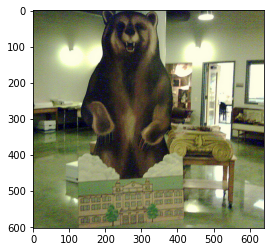

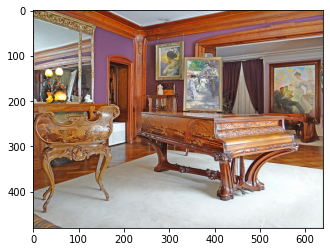

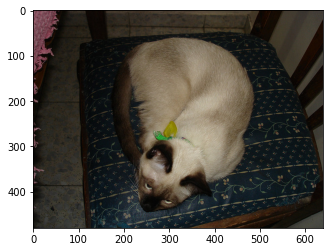

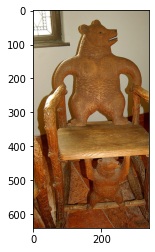

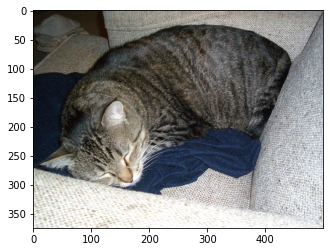

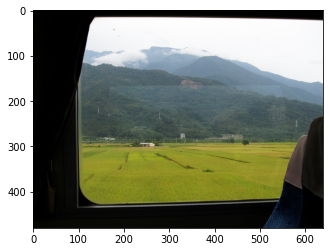

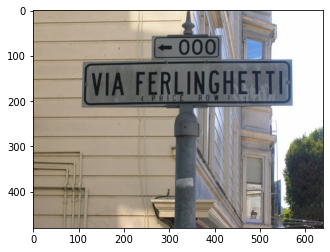

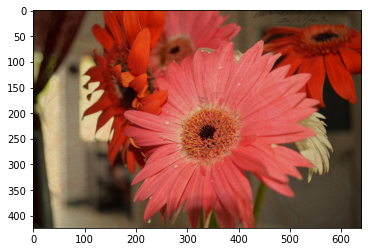

************************************


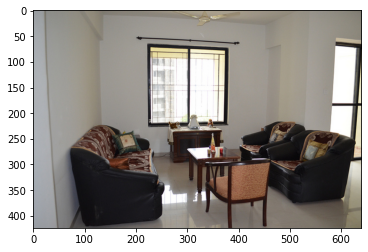

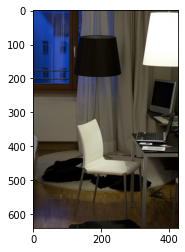

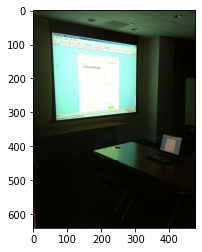

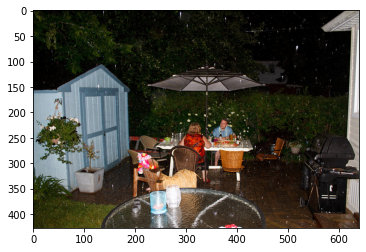

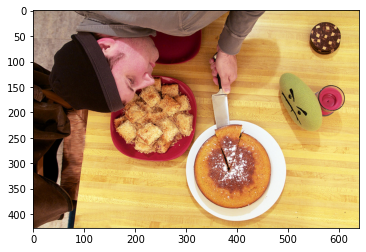

images with only 1 label: 8
cow
all images with the above key: 1389
images with only 1 label: 146
dining table
all images with the above key: 8378
images with only 1 label: 14
dog
all images with the above key: 3041
images with only 1 label: 215
horse
all images with the above key: 2068
images with only 1 label: 187
potted plant
all images with the above key: 3084
images with only 1 label: 11
sheep
all images with the above key: 1105
images with only 1 label: 70
couch
all images with the above key: 3170
images with only 1 label: 6
tv
all images with the above key: 3191
images with only 1 label: 31


In [21]:
import matplotlib.pyplot as plt
from PIL import Image
ids = list()
coco = COCO('annotations/instances_train2014.json')
for key, val in category_dict.items():
    img_ids = coco.getImgIds(catIds=[val])
    print(key)
    print('all images with the above key: %d'%(len(img_ids)))
    requiredID = list()
    for ids in img_ids:
        anns = coco.loadAnns(coco.getAnnIds(imgIds=[ids], iscrowd=None))
        if(len(anns) == 1):
#             if(key=='car'):
#                 print(anns)
#                 print('**********')
            requiredID.append(ids)
    if(key == 'chair'):
        for ids in requiredID:
            path = coco.loadImgs(ids)[0]["file_name"]
            plt.imshow(Image.open(os.path.join('train2014', path)).convert("RGB"))
            plt.show()
        ite = 0
        print('************************************')
        for ids in img_ids:
            if((ids not in requiredID) and (ite < 5)):
                path = coco.loadImgs(ids)[0]["file_name"]
                plt.imshow(Image.open(os.path.join('train2014', path)).convert("RGB"))
                plt.show()
                ite += 1
                
    print('images with only 1 label: %d'%(len(requiredID)))
    # ids.extend(img_ids)

    